## Identifying Parkinson's Disease through Vocal Patterns: A Data-Driven Approach

## Introduction:
Parkinson's disease (PD) is a chronic and progressive disorder, that arises due to the degeneration of nerve cells in the substantia nigra region of the brain (Surmeier et al., 2010, pp. 59–77). This area is responsible for the production of dopamine that affects many functions of the central nervous system, such as movement control, emotional limbic activity and cognitive functions (Sonne et al., 2023). Thus, abnormal activity in this area poses as a huge disruption in every crucial aspect of patients' lives. The common symptoms consist of: muscle stiffness, balance problems, involuntary tremors, and changes in speech pattern such as slurred articulation (BGDTEAM, 2022). In the UK, an estimated 145,000 people had PD in 2020 and it is predicted that 1 in 37 people alive today, will be diagnosed with PD within their lifetime (Reporting on Parkinson’s, n.d.). Since, PD is a terminal illness, this alarming information highlights how critical it is for an early diagnosis, as it will significantly aid the effectiveness of treatment and provide various management strategies, hence enabling us to preserve patients' independence. 

However, there is a concern. The current approach for diagnosis is very time-consuming and long-winded, as it involves a collection of: consultation on the observed symptoms, medical history, and a detailed physical examination (Parkinson’s Disease: Diagnosis, 2017). As a result, this evoked a profound interest in finding an accurate method for faster and non-invasive forms of detection through data-driven approaches(Rizzo et al., 2016).

This study seeks to explore the question, "Can machine learning models, accurately predict the presence of Parkinson's Disease based on vocal patterns? Which model performs the best in the task, and what are its strengths and limitations?". Initially, we will outline the various machine learning models, like Logistic Regression and Random Forest Trees and compare the performance of these models in metrics such as accuracy, precision, F1 score and recall to determine their effectiveness in identifying PD patients based on vocal features. Next, we will interpret these models to gain a deeper insight into understanding which specific vocal features are the most influential in predicting PD. Additionally, we shall identify the most promising approach for diagnosing PD using vocal patterns and evaluate the strengths and limitations of this model. Furthermore, we will assess the benefits and potential challenges that arise with deploying machine learning models in clinical settings, for instance, taking into consideration the ease of implementation, scalabilty and ethical implications of utilising machine learning for PD diagnosis. 

This research not only advances our understanding of the intricate relationship between vocal patterns and Parkinson's Disease but also has the potential to revolutionise the diagnostic process. By developing accurate and efficient machine learning models, we can facilitate early detection of PD, ultimately leading to better disease management and improved patient outcomes.

## Data Description

The Parkinsons dataset is derieved from the UCI Machine Learning Repository, which contains the voice measurements of 31 individuals: 23 with PD and 8 healthy individuals. The purpose of this data is to present the discriminative features between the two kinds of individuals, solely using their biomedical voice recordings. This dataset poses to be helpful for research concerning PD diagnosis and to train machine learning models.

**Dataset Composition:**
The dataset contains 195 instances, each representing a voice recording from an individual. It also contains 23 attributes, with one binary variable named, "Target", that categorises each individual with a value of '0' for healthy individuals and '1' for those with PD. Moreover, the original dataset on the website consists of one extra variable, 'Name', which is a categorical variable, thus was dropped from the analysis.

**Variables:**
The 23 attribute variables are a combination of linear and non-linear measurements. All of these independent variables are continuous data types and are expressed in the form of a ratio. They are:
1. MDVP:Fo(Hz) = Average vocal fundamental frequency
2. MDVP:Fhi(Hz) = Maximum vocal fundamental frequency
3. MDVP:Flo(Hz) = Minimum vocal fundamental frequency
4. MDVP:Jitter(%) = measures of variation in fundamental frequency
5. MDVP:Jitter(Abs) = measures of variation in fundamental frequency
6. MDVP:RAP = measures of variation in fundamental frequency
7. MDVP:PPQ = measures of variation in fundamental frequency
8. Jitter:DDP = measures of variation in fundamental frequency
9. MDVP:Shimmer = measures of variation in amplitude
10. MDVP:Shimmer(dB) = measures of variation in amplitude
11. Shimmer:APQ3 = measures of variation in amplitude
12. Shimmer:APQ5 = measures of variation in amplitude
13. MDVP:APQ = measures of variation in amplitude
14. Shimmer:DDA = measures of variation in amplitude
15. NHR  = measures of ratio of noise to tonal components in the voice
16. HNR  = measures of ratio of noise to tonal components in the voice
17. Target = Health status of the subject: 1 - Parkinson's, 0 - healthy
18. RPDE  = nonlinear dynamical complexity measures
19. D2  = nonlinear dynamical complexity measures
20. DFA	 = Signal fractal scaling exponent
21. spread1 = nonlinear measures of fundamental frequency variation
22. spread2	 = nonlinear measures of fundamental frequency variation
23. PPE = nonlinear measures of fundamental frequency variation

**Labels:**
There is only one binary variable, 'Target' with two possible values:
0 - Healthy individual
1- Individual with PD

**Insights:**
This dataset is a means of a non-invasive data-collection of voice measurements. By analysing the relationships between the 23 features, we can identify the relationship between the disease's impact on voice and speech production. Since the data has undergone pre-processing, we can assume that there are no missing values(checked in EDA), as this impact the model's performance and generalisability. ***

## Exploratory Data Analysis (EDA)

The purpose of EDA is to provide a comprehensive insight into the dataset - identifying patterns, potential issues and relationships. This informations serves as a crucial foundation, as we have a good understanding on our data, and are well-informed on how we can build our models and guide subsequent analysis.

In [82]:
# Imports
import pandas as pd # To handle data manipulation and analysis using DataFrame objects
import numpy as np # To compute mathematical operations
import matplotlib.pyplot as plt # To create static and animated visulisations
import seaborn as sns # To create more informative and attractive statistical graphs based on matplotlib

# Imports from Scikit-learn library for EDA and model implementation
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [83]:
# Load the parkinsons dataset
parkinsons_data = pd.read_csv('parkinsons.csv', header=None)

# Define column headers
column_names = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', ' MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'Target', 'RPDE', 'D2', 'DFA', 'spread1', 'spread2', 'PPE']
parkinsons_data.columns = column_names

# Print a few of the first rows to check whether the headers have been assigned
print(parkinsons_data.head()) 

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer:DDA      NHR     HNR  Target      RPDE        D2       DFA  \
0

In [84]:
# Check the dimensions of the dataset:
print('Dimensions: ', parkinsons_data.shape)

Dimensions:  (195, 23)


As mentioned in the data description, the dataset has a dimensionality of 195 and 23 features, thus is considered a small dataset, as it only considers information from 31 volunteers. A pro of this number is that it would require less computational resources, hence it is faster to process and analyse. On the other hand, it has a risk of 'underfitting', because the model may not have sufficient information to learn the underlying patterns in the data.

In [85]:
# Check the structure of the dataset:
print('Structure: ', parkinsons_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12   MDVP:APQ         195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  Target            195 non-null    int64  
 1

This dataset consists of 22 'float64' datatype, which represents a floating-point number with double precision of a continuous numerical variable. The benefits of this datatype are that it provides much greater precision compared to other datatypes such as 'float32' and 'int'; it avoids precision errors due its larger range of values - meaning that the chance of errors is significantly reduced - ensuring more accurate results. There is only 1 'int64' representing a discrete numerical variable. This is beneficial since the binary variable only uses one bit to represent each value, hence it is a more compact representation of teh data and reduces storage requirements. There are 0 missing values in the processed dataset, therefore it faciliates machine learning and we do not need to implement any data handling strategies and the algorithms performed on the dataset will be more accurate and reliable.

In [86]:
# Check the summary statistics of the dataset:
print('Summary statistics: ', parkinsons_data.describe())

Summary statistics:         MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   

From observing the central tendency, mean and meadian(displayed as 50%), we can delineate that there could be skewed distributions present in our dataset. To confirm, we will create histograms to visualise the distributions of each variable in the dataset.

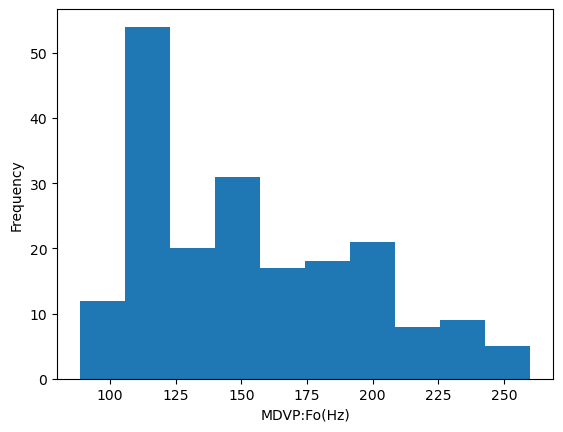

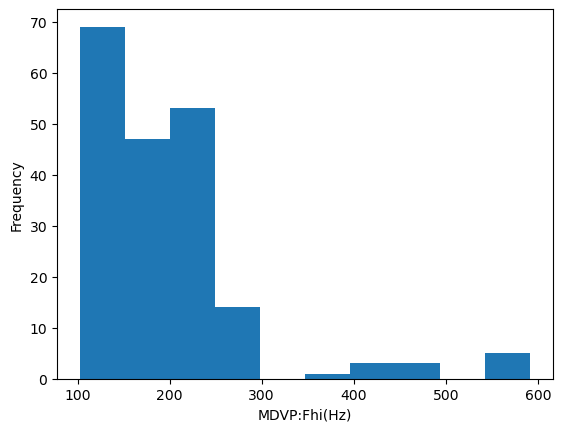

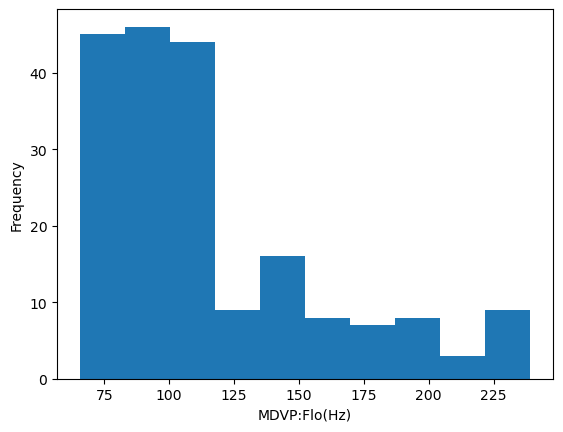

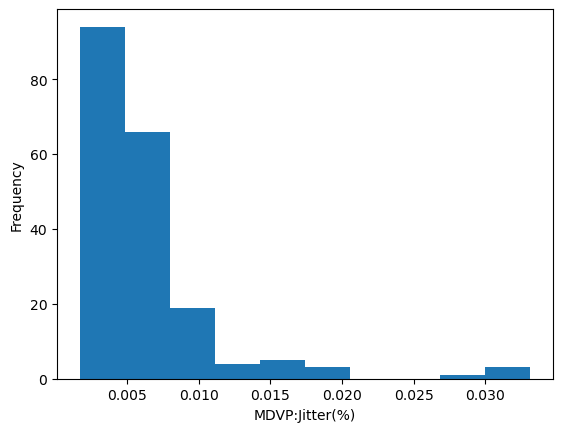

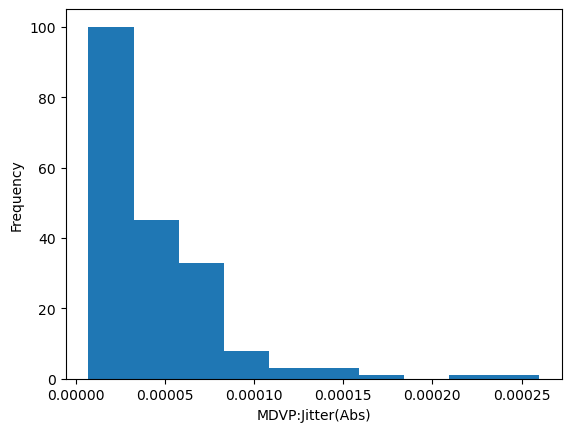

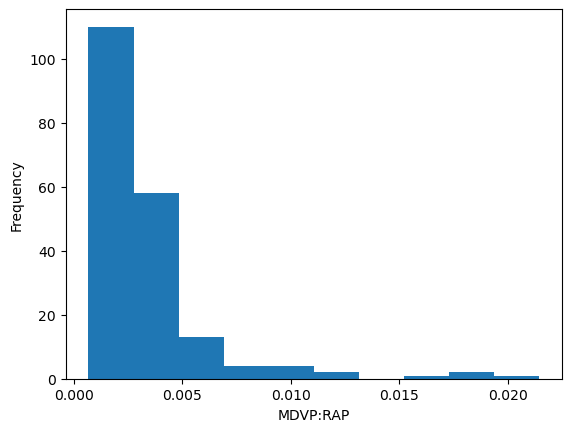

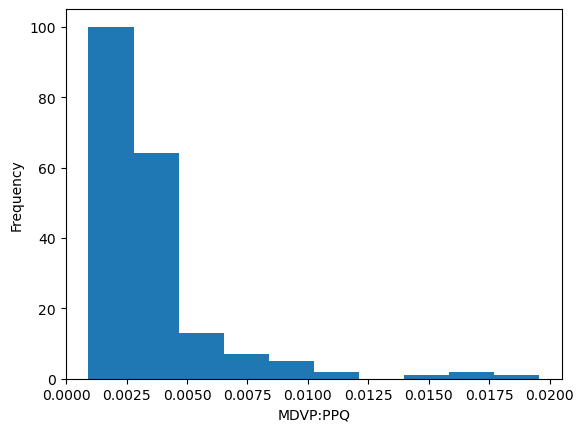

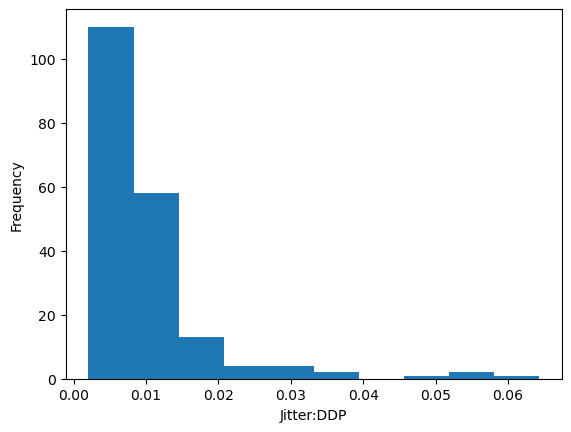

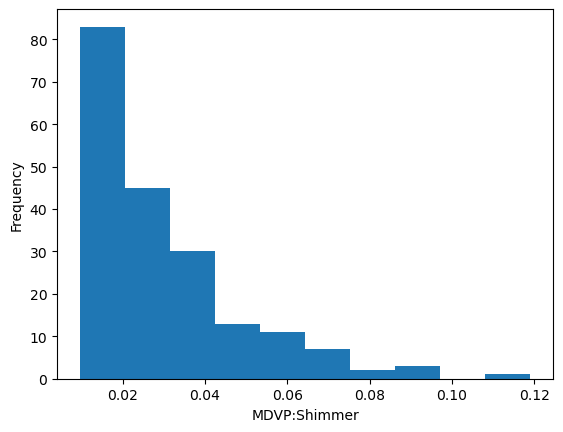

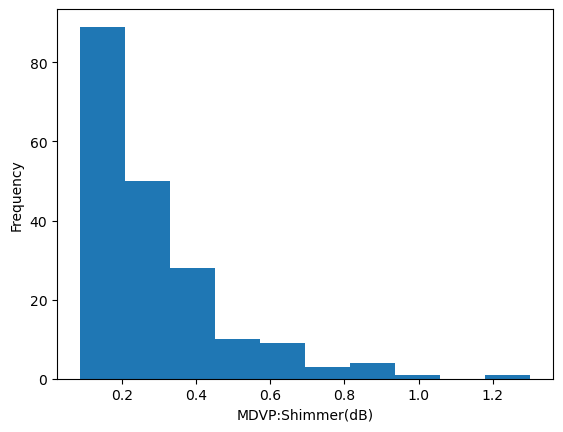

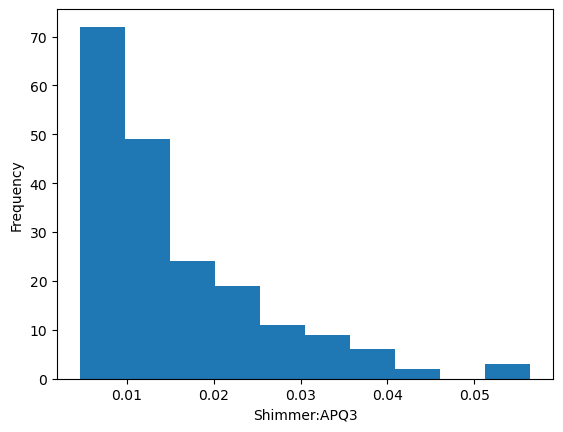

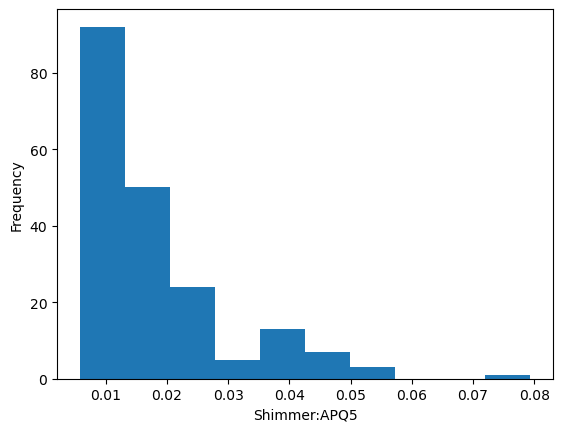

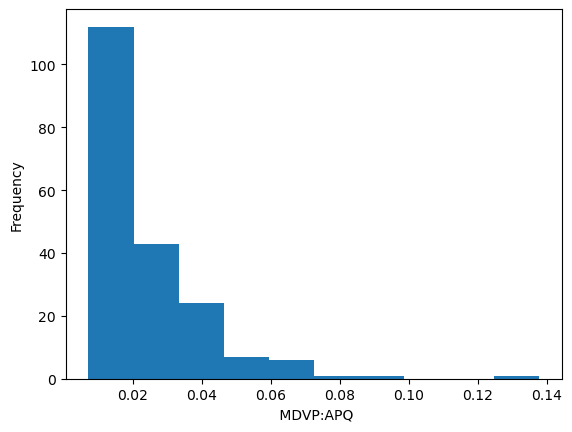

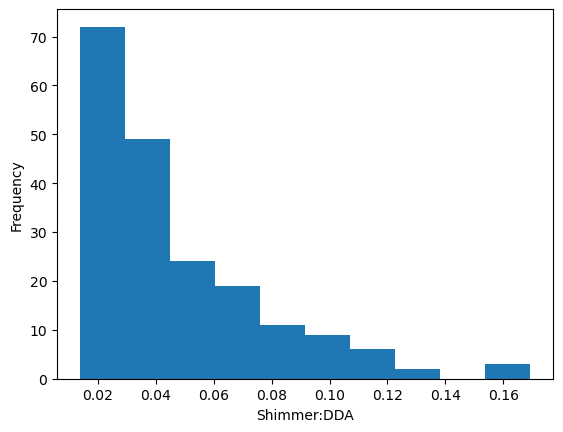

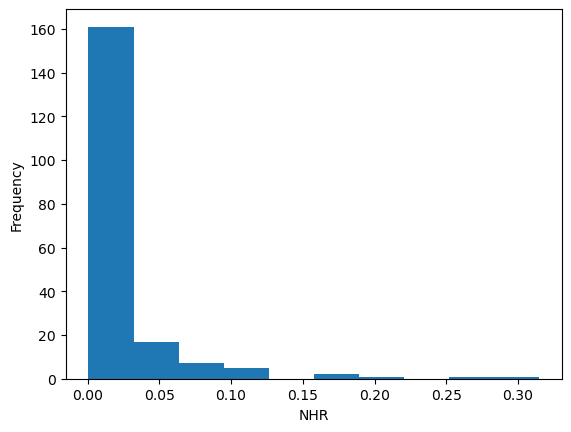

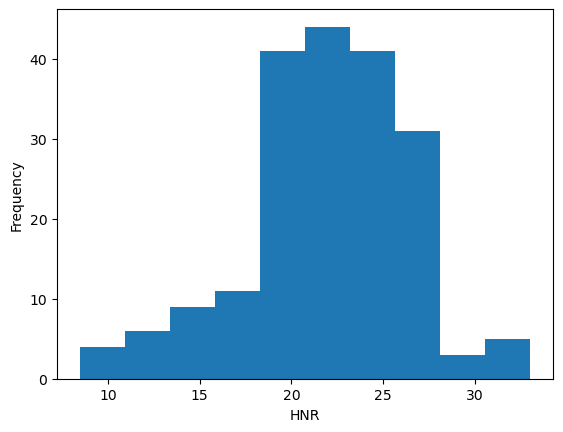

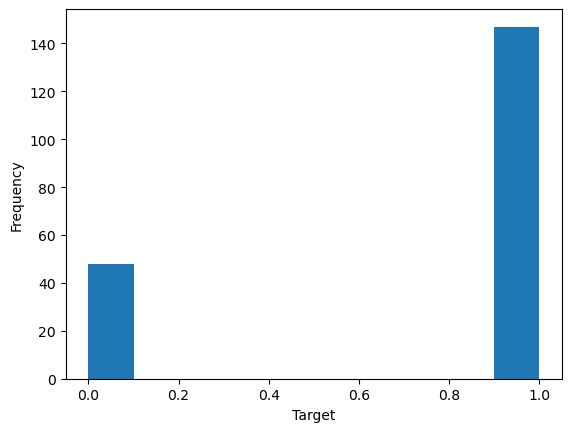

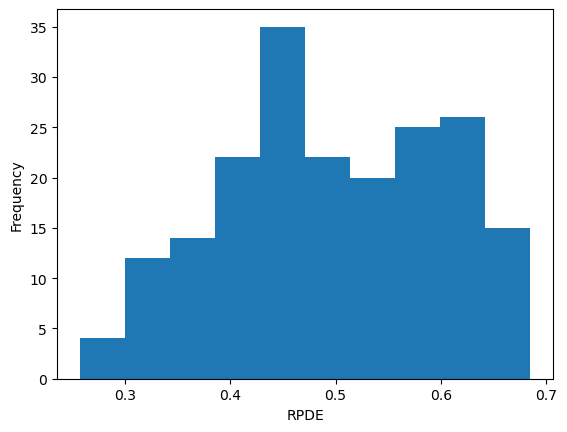

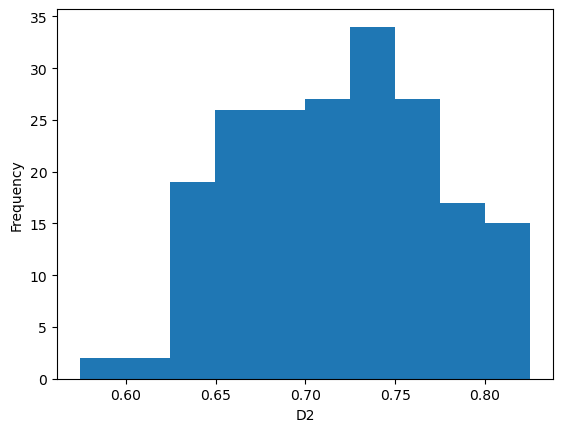

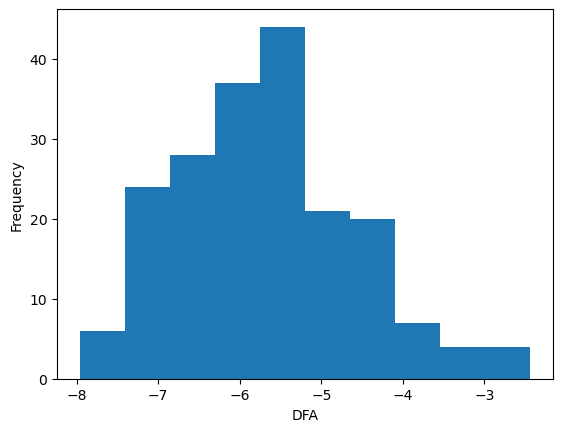

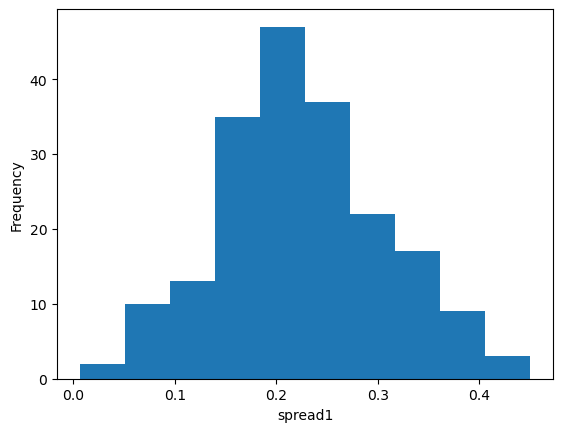

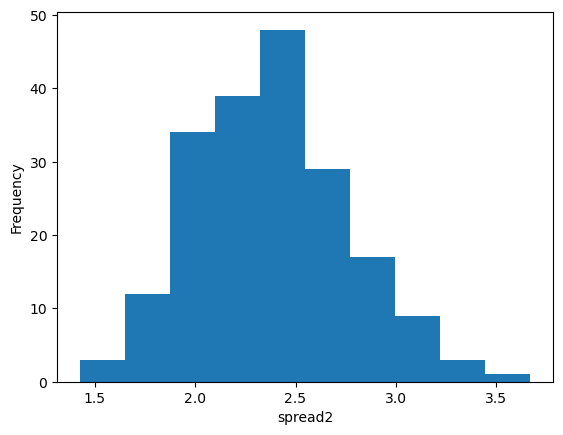

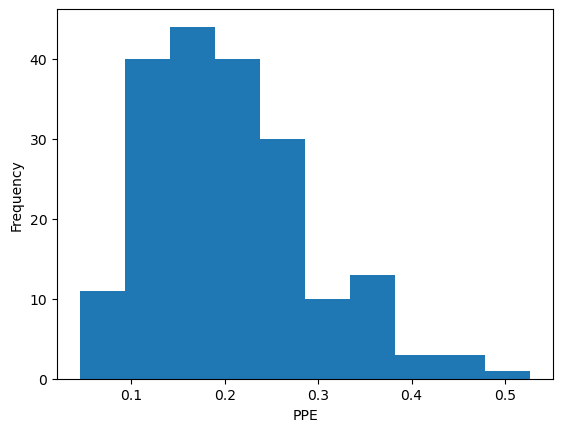

In [87]:
# Presenting histograms for each variable to visualise data distributions
for columns in parkinsons_data.columns:
    plt.hist(parkinsons_data[columns], bins=10)  # 10 bins
    plt.xlabel(columns)  # Set the x-axis label to the column name
    plt.ylabel('Frequency')  # Set the y-axis label
    plt.show()  # Display the histogram

The histograms display the frequency distribution of a dataset, splitting the data into bins and displaying the number of observations that are categorised within each bin. We can observe that the independent variables: MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, are positively skewed. This indicates that the data is skewed towards the right, with the majority of the observations being on the left-hand side; there are potential outliers or extreme-values at the right of the distribution, that may impact the statistical analysis. This means that their mean value is greater than the median value, since the tail is present on the right-hand side of the distribution, pulling the mean towards the higher values. We can also clarify that the mode is not the centre of distribution and is located at the value more towards the left of the distribution. On the other hand, variables such as DFA, and PPE are normally distributed - with the mean and the median being in close range. For these two variables, the tail in frequency is present in both directions away from the centre. Furthermore, the spread of: RPDE, spread1, and spread2 delineates a wide range in standard deviation, yet the data seems to also be normally distributed.

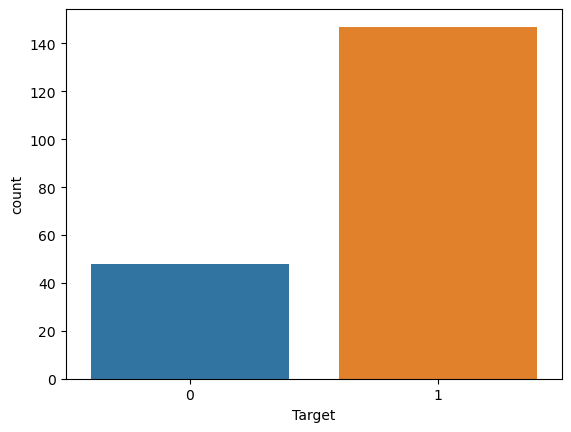

In [88]:
# Check distribution of the target variable
sns.countplot(x="Target", data = parkinsons_data)
plt.show()

The countplot presents the distribution of the 'Target' variable which is a binary variable that indicated the presence or absence of PD. The plot shows significant class imbalance, as the class frequencies are biased, indicating that the data is biased towards patients with PD. This may impact the accuracy of our machine learning model. Morever, this is a very helpful insight, because we have establised that the machine learning model we need to select is one that is more robust to imbalanced data.

We must check for class separatabilty of this variable using a PCA scatter plot to provide valuable insights into the distribution of data points for each class in two dimensions. This is important to understand the limitations of this analysis and aids our machine learning models to achieve better predictions of PD diagnosis.

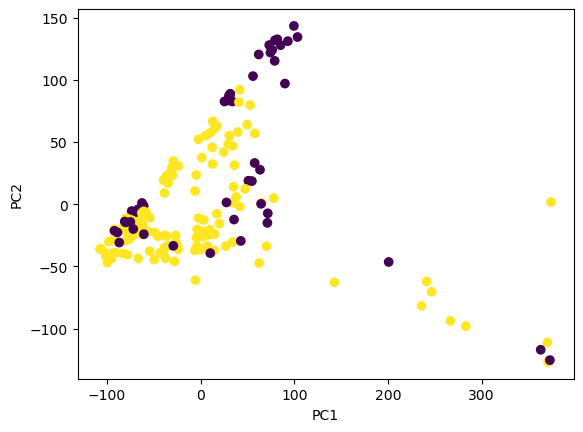

In [89]:
# Check for class separability

# Separate the features and target variable
X = parkinsons_data.drop('Target', axis=1)
y = parkinsons_data['Target']

# Apply PCA to reduce the dimensionality of the features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot of the data points for each class
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

The scatter plot portrays some degree of class separability in the data. There are clusters of PD patients and healthy individuals that are vaguely separated from each other.The two principal components generated capture a significant amount of variance in the data, with PC1 and PC2 providing linear combinations of the original features, showing the most variation in the dataset. We can also witness a few outliers visible in the scatter plot, which indicate subgroups within the dataset that need further investigation. It is important to understand the nature of these outliers before making any conclusions based on the data. There is some overlap between the PD and healthy clusters, indicating that some individuals might have similar voice features despite having different health conditions.

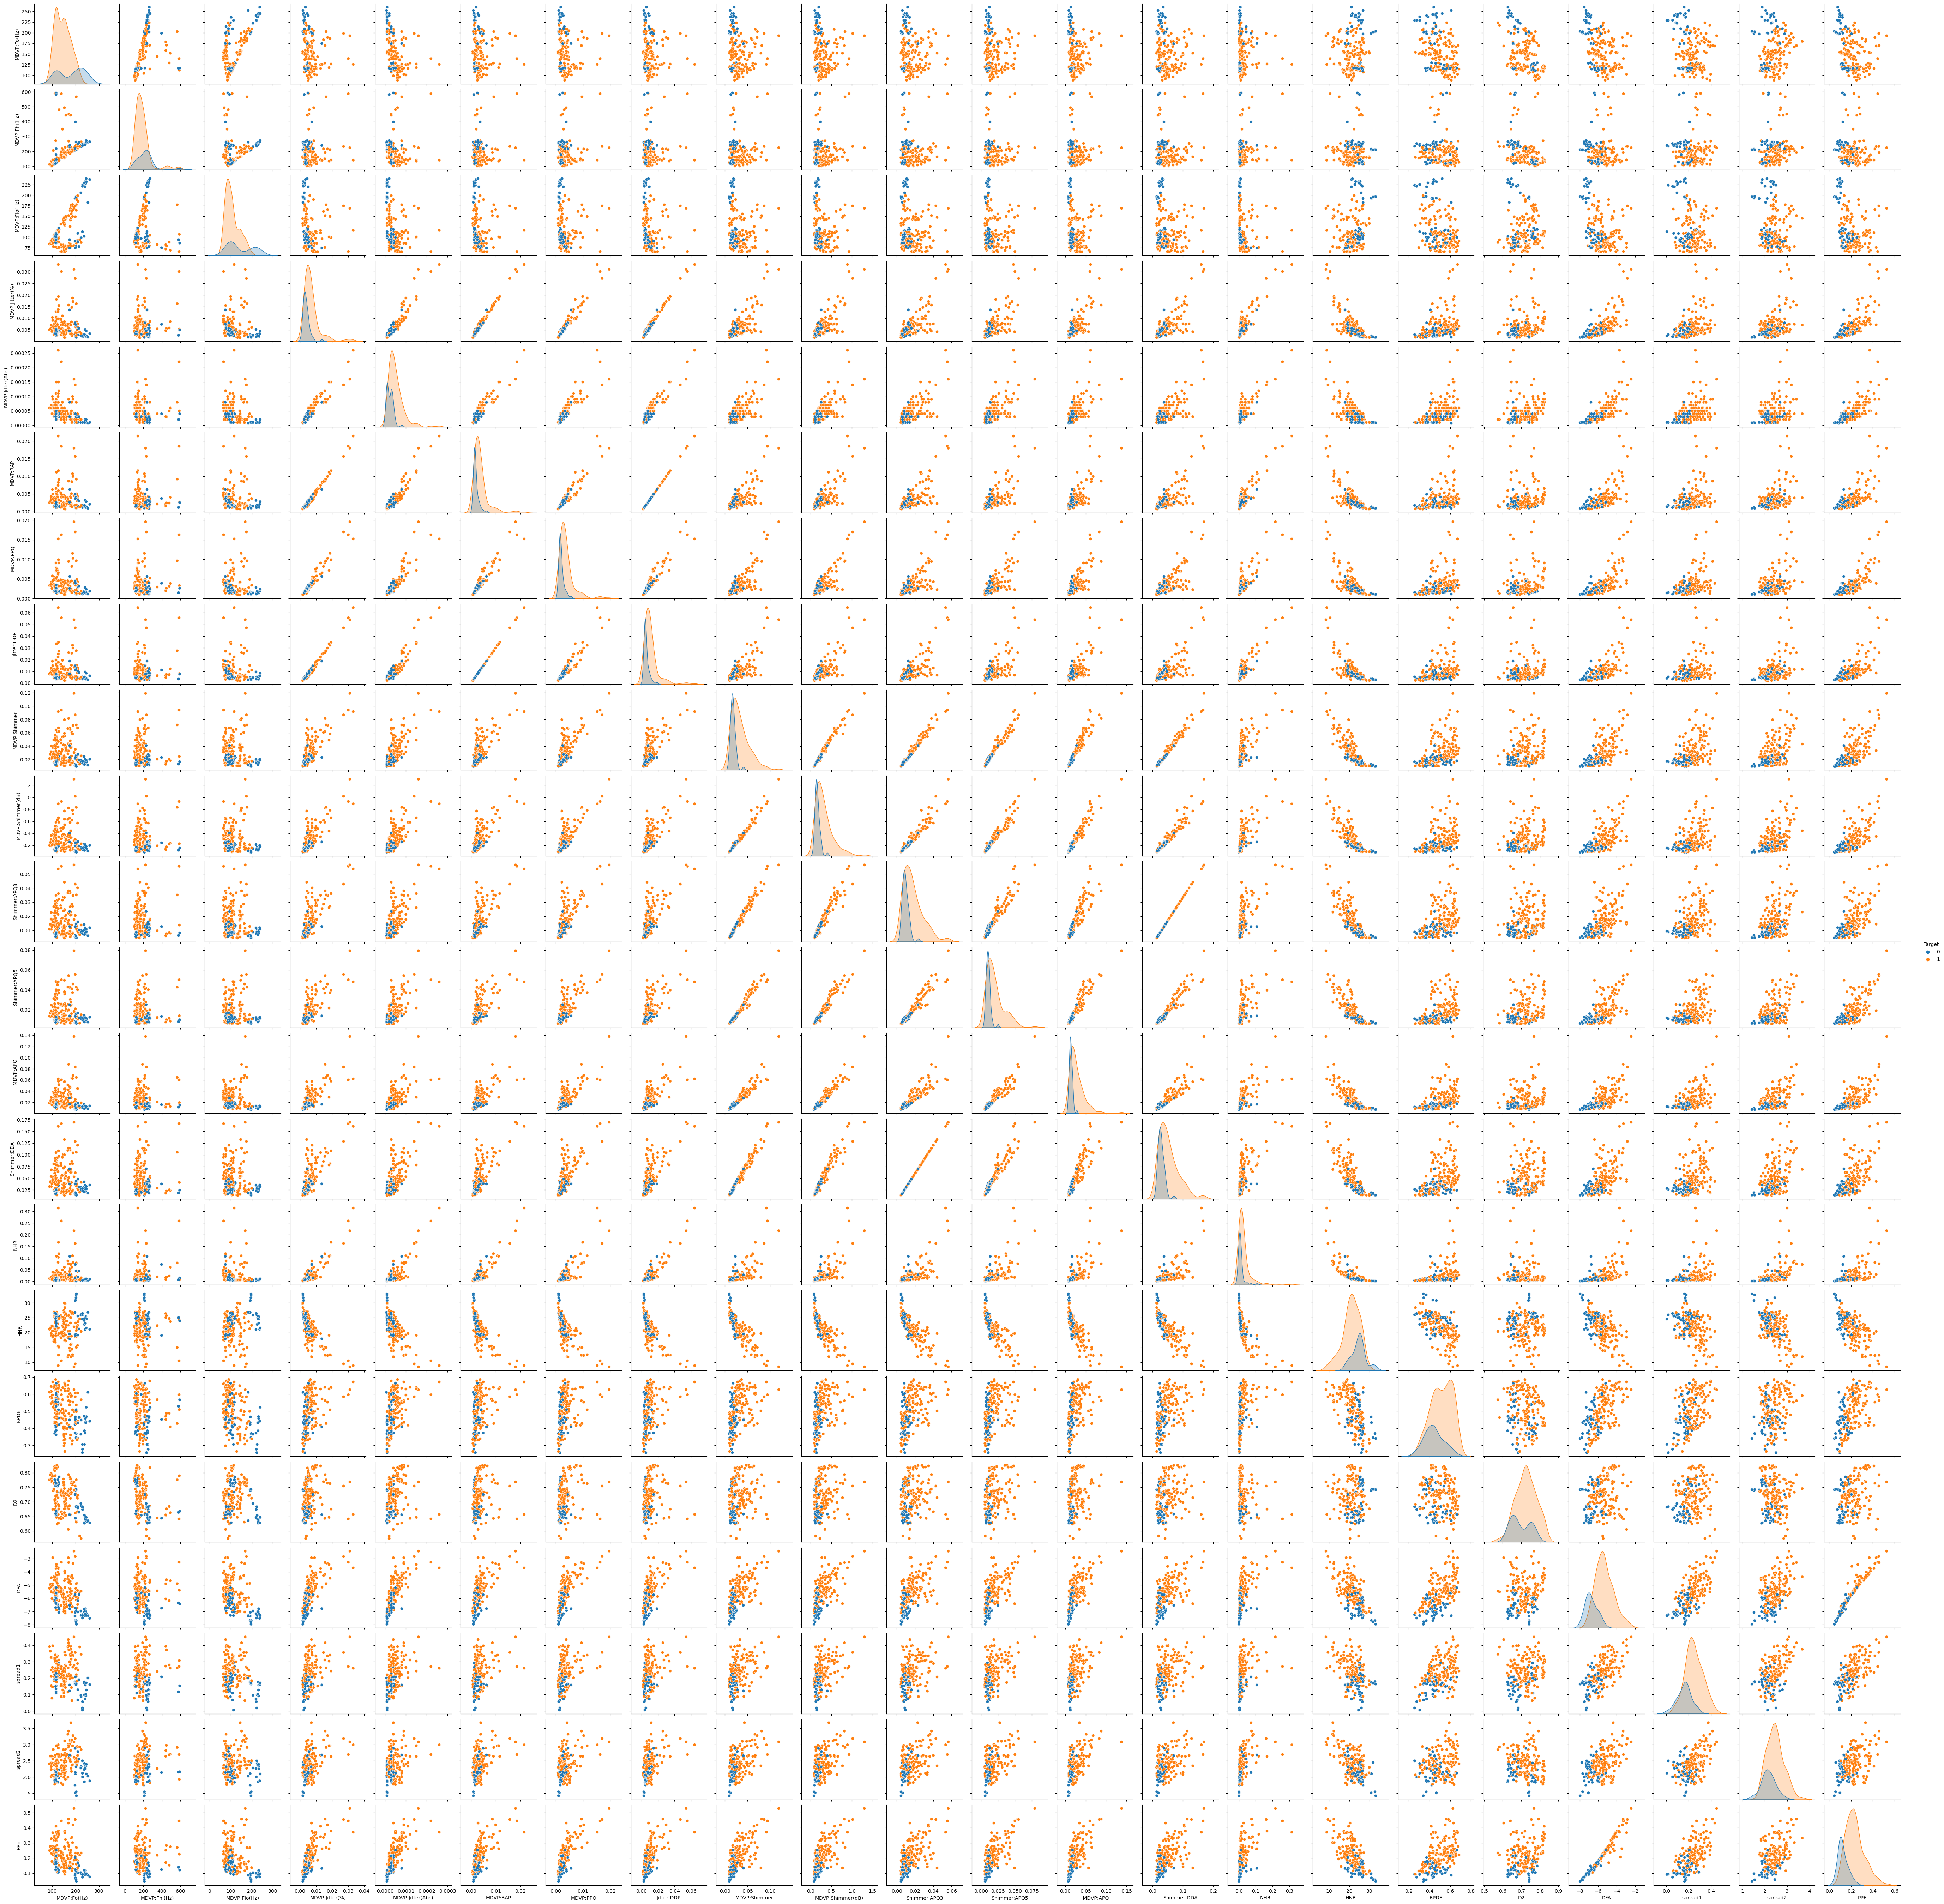

In [90]:
# Plot pairwise relationships between variables to understand the relationships
sns.pairplot(data=parkinsons_data, hue="Target")
plt.show()

In a pairplot, the 'x' and 'y' axis represents the variables and a scatter plot of the 2 variables against is portrayed at the intersecting cell; whilst the diagonal represents a histogram to show the distribution of the feature. They interestingly display the correlations between variables, conveying strong positive or negative linear relationship. They are quick identification of outliers, as they are significantly deviated from the general trend of the data. Moreover, another advantage is that they show non-linear relationships between variables, which may not be deemed obvious when analysing labels separately. Whilst it is a useful way to represent and visualise relationships, it is too cluttered and difficult to read, when applied to a large dataset.

Thus, to gain a clearer and a more interpretable data distribution, we are going to envision our dataset and identify outliers using a boxplot. This is because they are robust to outliers, thus act as an effective tool to identify extreme values that fall outside of the interquartile range.

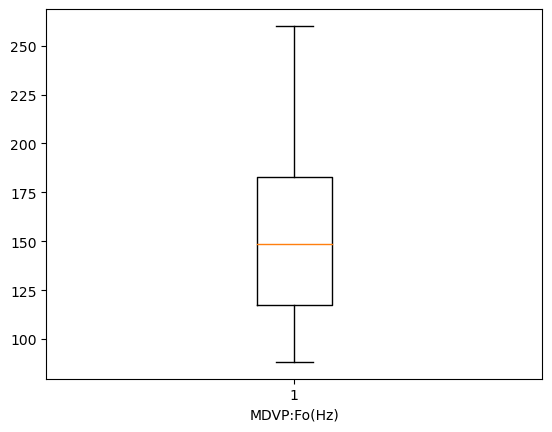

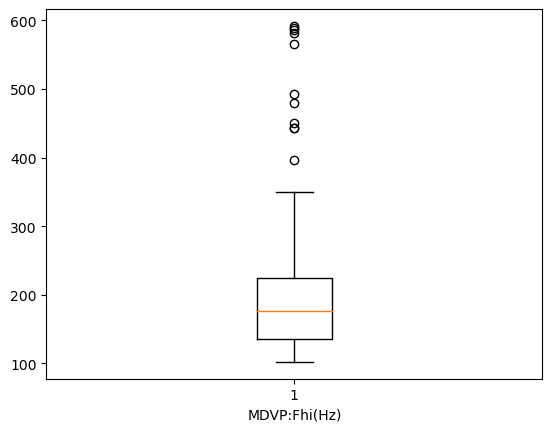

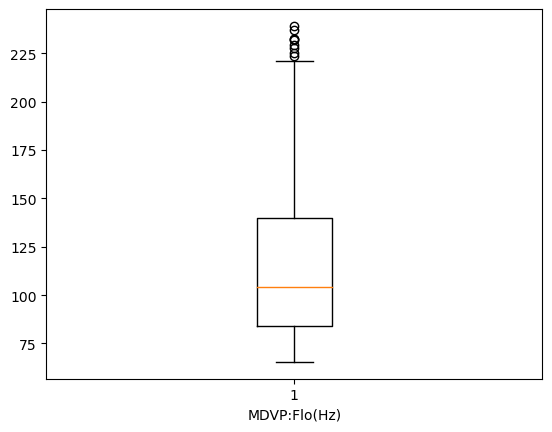

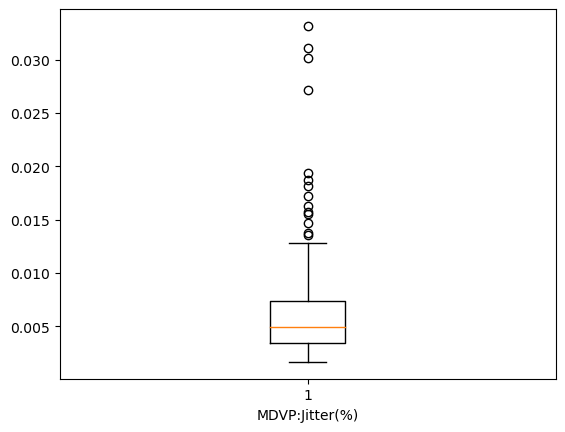

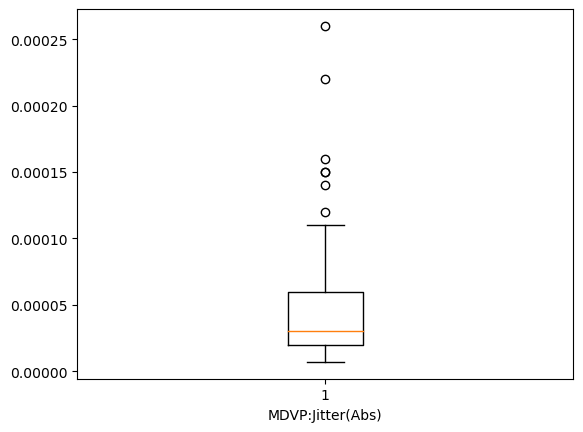

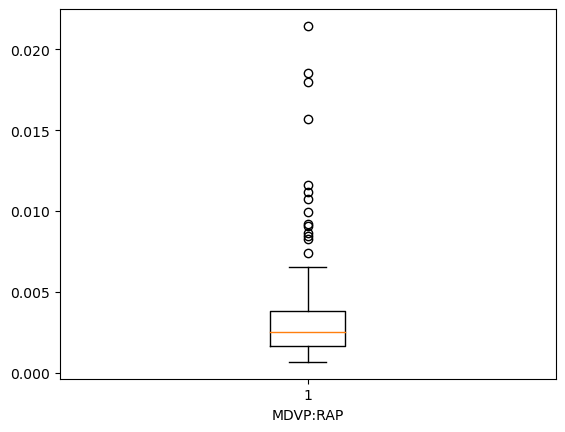

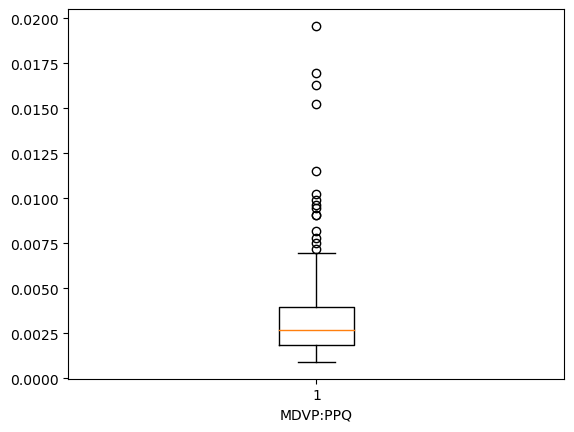

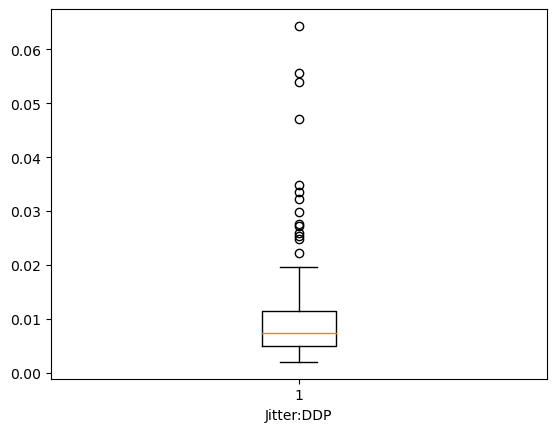

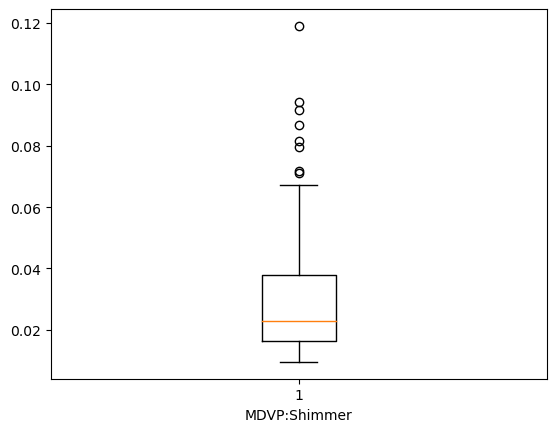

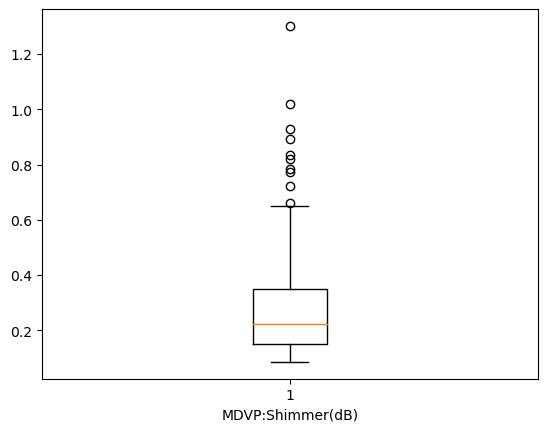

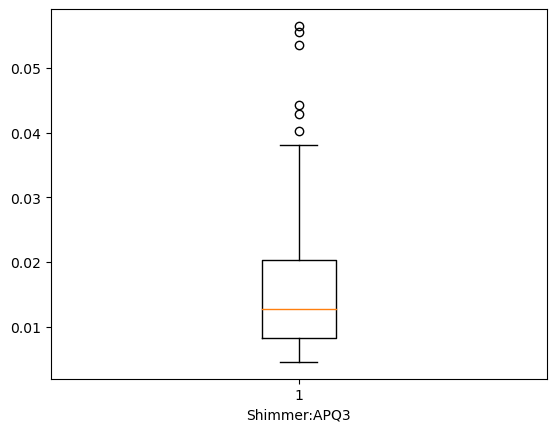

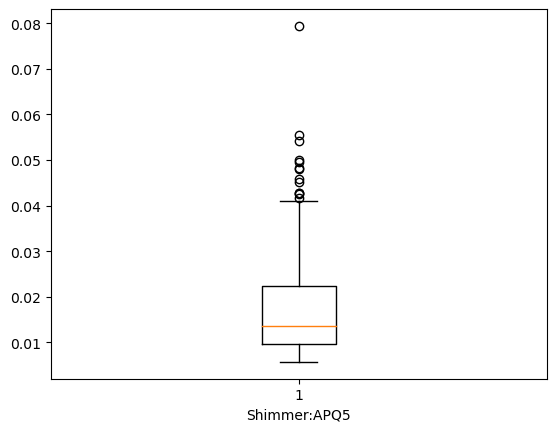

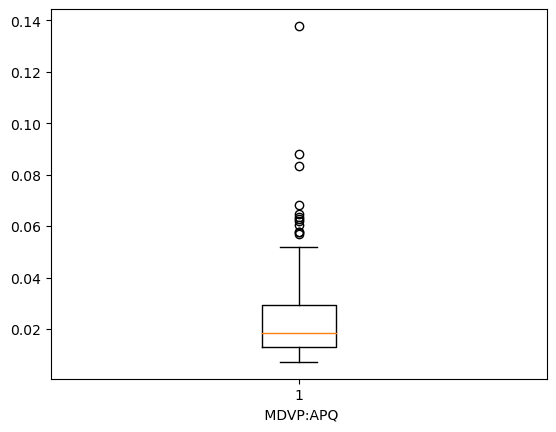

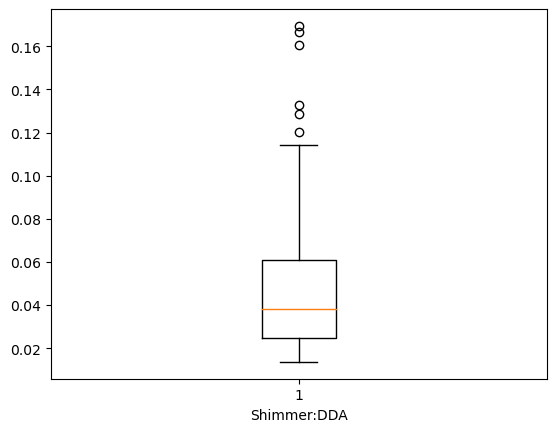

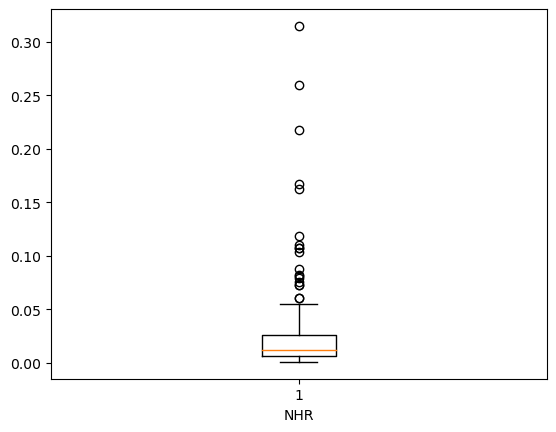

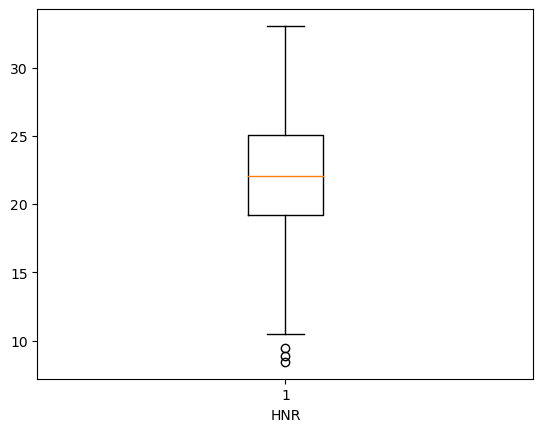

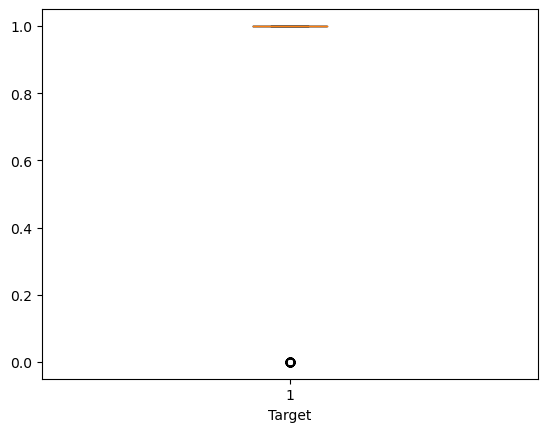

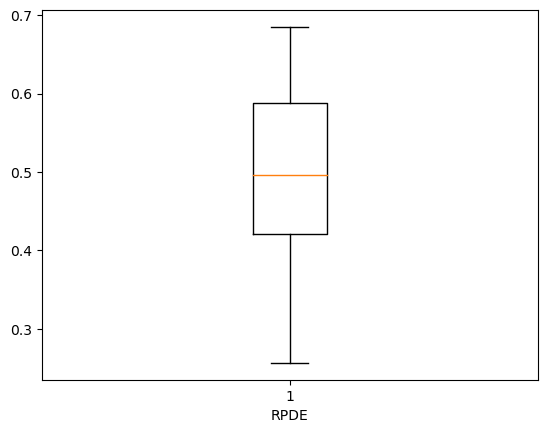

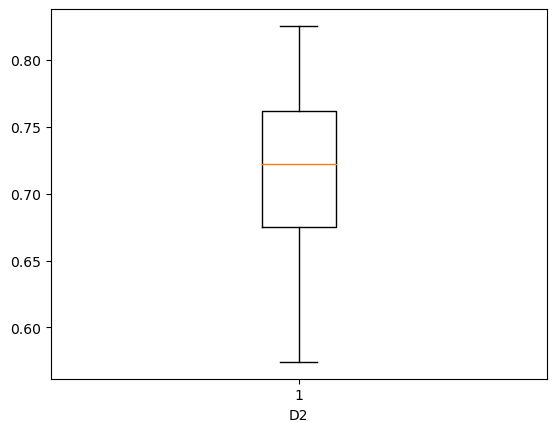

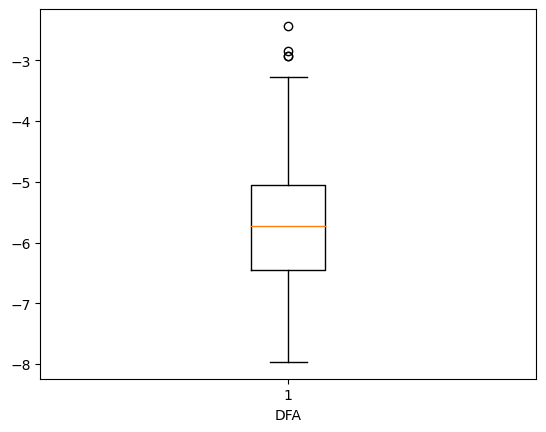

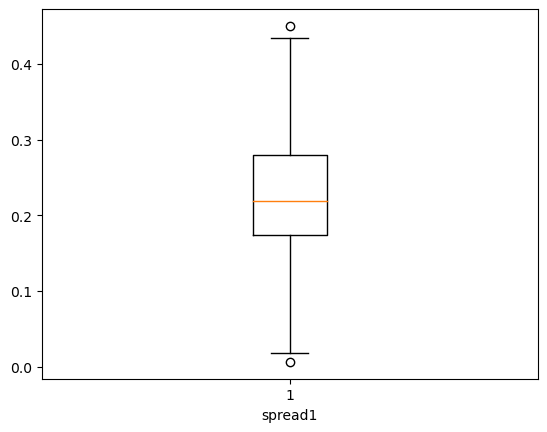

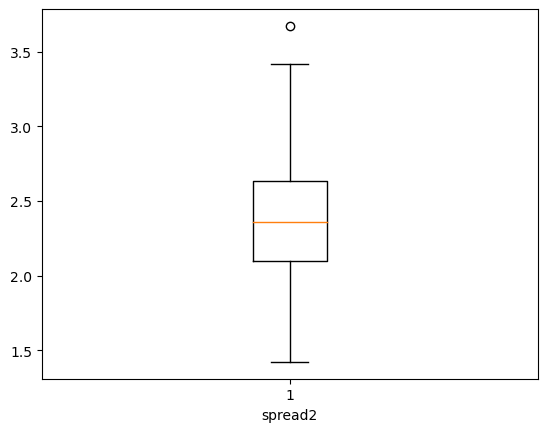

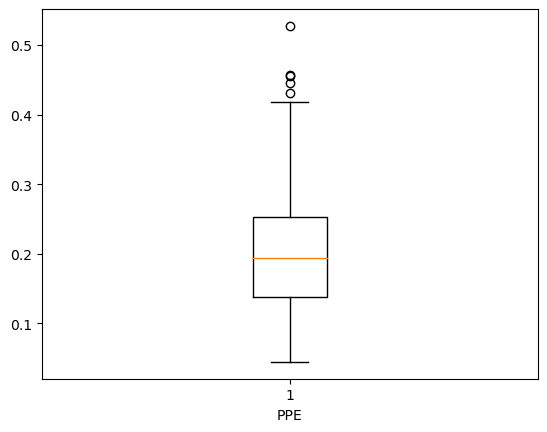

In [91]:
# Visualise data distributions by checking for outliers by plotting a box plot
for columns in parkinsons_data.columns:
    plt.boxplot(parkinsons_data[columns])
    plt.xlabel(columns)
    plt.show()

MDVP:Fo(Hz) - There are a few outliers in the lower and upper ranges of the fundamental frequency. The upper ranger dominates the lower, indicating that the upper whisker values are significantly higher than the majority of the data. These outliers may indicate individuals with atypical voice pitch, which might be caused by factors other than PD.

MDVP:Fhi(Hz) and MDVP:Flo(Hz) - There are some outliers in the higher range of these variables, suggesting individuals with unusually high maximum and minimum vocal frequencies, suggesting that perhaps that these measurements are impacted by the severity of the patients' condition.

Jitter and Shimmer variables - These variables contain several outliers, indicating individuals with higher levels of vocal fold vibration irregularity and amplitude variation. These measures are known to be associated with PD, and such outliers might be related to the severity of the disease.

NHR and HNR - There are also outliers in the Noise-to-Harmonics Ratio (NHR) and Harmonics-to-Noise Ratio (HNR) variables, indicating individuals with unusual levels of noise and harmonics in their speech signals.

RPDE, D2, DFA, and PPE - While these nonlinear dynamic variables seem to have fewer outliers, there might still be some unusual values. Outliers in these variables might indicate individuals with atypical speech signal complexity or irregularity patterns or potentially that there is some other underlying factor.

Overall, the presence of outliers in our data cannot be deemed as a negtaive thing, as it shows how genuine and variable our data is and encovers unapparent patterms from the data points. It also helps us identify an area for for further research, i.e. how the extremities in outliers relates to the severity of the disease.

By combining these EDA techniques, we have gained valuable insights into the data and identified the most important features that are relevant for diagnosing PD. This will help us build more accurate and reliable machine learning models for diagnosing PD based on voice recordings.

## Building Models and Discussing Results

### Model 1: Logistic Regression

Logistic regression is a type of classification model used to predict the possibility of an input belonging to one of the two possible classes(0 or 1). It is a generalised linear model that models the relationship between the input features and the 'Target' variable, using a logistic function. The coefficients of the linear varaibles are combined in a logistic function to produce a probabilty score; if the probability score is greater than or equal to 0.5, the input is classed as belonging to the positive class, otherwise to the negative.

In the context of machine learning models being used to accurately predict the prescence of PD, logistic regression can be used to learn the relationship between the various input variables and the 'Target' variable(i.e. whether a patient has PD or not). By using this dataset to train the logistic regression model using labeled examples, the model can learn to predict the possibility of a patient having PD according to their acoustic measurements. Later, after the model is trained, we can use it to make predictions on new and unseen data, where we can evaluate its precision, recall and F1 score. If the model correlates to a high accuracy, it can be approved to diagnose PD in new patients. 

In [93]:
# Assigning features to X and y
X = parkinsons_data.drop('Target', axis=1)
y = parkinsons_data['Target']

# Scale the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a logistic regression model with L2 regularization
lr = LogisticRegression(max_iter=10000, penalty='l2', C=0.1)
lr.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred)
cm_lr = confusion_matrix(y_test, y_pred)

print('Accuracy:', acc_lr)
print('Confusion Matrix:', cm_lr)

# To calculate the model's precision, recall, specificity and f1_score
# These measurements are evaluated in the comaprisons of the models
TN, FP, FN, TP = cm_rf.ravel()

precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_score = 2 * (precision * recall) / (precision + recall)

print('Precision:', precision)
print('Recall:', recall)
print('Specificity:', specificity)
print('F1 Score:', f1_score)

Accuracy: 0.8813559322033898
Confusion Matrix: [[ 9  6]
 [ 1 43]]
Precision: 0.9347826086956522
Recall: 0.9772727272727273
Specificity: 0.8
F1 Score: 0.9555555555555557


Initially, we have assigned the input features to 'X' and the 'Target' variabe to 'y', which shows whether the person has PD(1) or not (0). These input features are scaled using the 'StandardScaler' which standardises the data and transforms it into a normal distribution curve, with a mean of 0 and a standard deviation of 1. This is a critical step because when the features are on the same scale, machine learning models perform better. The dataset is split into 70% training and 30% testing sets, which is important because it allows the model to be trained on the data and also tested on another unseen subset. Thus, the model is able to provide a unbiased evaluation of its performance. Moreover, this logistic regression model is trained on the training with L2 regularisation, which helps to prevent overfitting by adding a penalty term to the model, enabling it to learn simpler and more general patterns present within the dataset. Lastly, the training model is evaluated on the test set. This happens by predicting the target labels and comparing them to their actuals labels. The model's accuracy and confusion matrix are measured.

Here, we are also displaying a visualisation of our confusion matrix in a confusion matrix heatmap. This is a graphical representation of the confusion matrix and helps clarify what the strengths and weaknesses of our model are when classifying patients with and without PD.

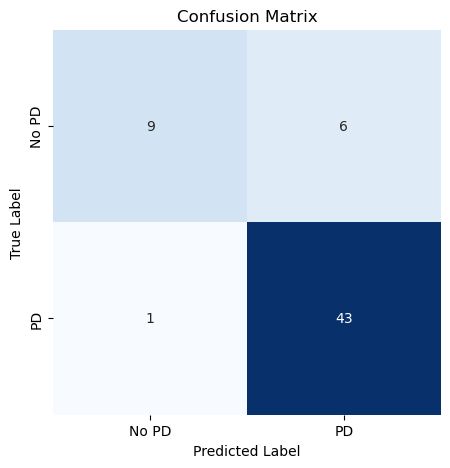

In [94]:
# Plot the confusion matrix heatmap
def confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Call the defined function with the confusion matrix and class labels
cm_lr = [[ 9,  6],
         [ 1, 43]]
classes = ['No PD', 'PD']
confusion_matrix(cm_lr, classes)

The model presented an accuracy of approximately 88.14%(2 decimal places), in which it correctly identified that 88.14% of the datset have PD. While this may seem like a reasonably good performance, it's crucial to consider this dataset's class distribution before drawing any conclusions. The dataset is imbalanced, with the number of PD patients dominating the healthy individuals, therefore the accuracy metric can be misleading, as the model might perform well on the majority class (PD patients) but poorly on the minority class (healthy patients).
Additionally, the confusion matrix helps us to understand the performance of the model in more detail. It is a 2x2 matrix that displays the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions. So, when we interpret the confusion matrix, we can see that the number of people correctly identified (TP) as having PD were 43, 9 patients were correctly identified as not having (TN) Parkinson's disease, 6 patients were incorrectly identified as having (FP) Parkinson's disease and 1 patient was incorrectly identified as not having (FN) Parkinson's disease. Furthermore, it also helps us gain insights into the model's performance on both classes, helping us identify its weaknesses. For example, it highlighted that this model has a high number of false positives, which indicates that it is likely capable to misclassify patients healthy individuals as PD patients. This can have negative implications when executed in hospitals, as it leads to further unnecessary tests and treatments for these patients, thus costing our NHS millions of expenditure.

### Model 2: Random Forest Trees

This is a learning method that combines multiple decision trees to create a more accurate model. It is developed in the basis that a group of weaker models can outperform a singular strong model. This algorithm functions by creating multiple decision trees by randomly selecting a subset from the training data with a subset of features for each tree. Then, each decision tree is trained independently using the Classification and Regression Trees algorithm. Lastly to make a prediction, the algorithm uses each decision tree to predict the output for a given input. Since this is a classification problem, the majority vote among all trees is chosen as the final output.

This model has been chosen for this problem because its robustness. This means that it is less likely to be overfitted in comparison to a single decision tree, as it averages the results over multiple trees, therefore is a more representative and a generalised model, leading to improved performance on unseen data. It is highly accurate, as it is able to combine predictions from various trees, capturing unobvious patterns in the individual trees. Next, you could also use it find which factors are the most influential in diagnosing PD.

In [99]:
def train_evaluate_rf(X_train, X_test, y_train, y_test, n_estimators=100, random_state=42):
    # Train a random forest model
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    rf.fit(X_train, y_train)

    # Evaluate the model on the testing set
    y_pred = rf.predict(X_test)
    acc_rf = accuracy_score(y_test, y_pred)
    cm_rf = confusion_matrix(y_test, y_pred)

    return acc_rf, cm_rf

# Assuming X_train, X_test, y_train, and y_test are already defined
acc_rf, cm_rf = train_evaluate_rf(X_train, X_test, y_train, y_test)

print('Accuracy:', acc_rf)
print('Confusion Matrix:', cm_rf)

# To calculate the model's precision, recall, specificity and f1_score
# These measurements are evaluated in the comaprisons of the models
TN, FP, FN, TP = cm_rf.ravel()

precision = TP / (TP + FP)
recall = TP / (TP + FN)
specificity = TN / (TN + FP)
f1_score = 2 * (precision * recall) / (precision + recall)

print('Precision:', precision)
print('Recall:', recall)
print('Specificity:', specificity)
print('F1 Score:', f1_score)

IndexError: Inconsistent shape between the condition and the input (got (59, 1) and (59,))

<Figure size 500x500 with 0 Axes>

Our first step is to train the random forest model, which we accomplish by initialising the Random Forest classifier with 100 trees and a fixed random state of 42 for reproducibility. Secondly, we train the model on the training dataset using the 'fit' method. The 'predict' method is used to generate predictions for the testing set(X_test), with its 'accuracy_score' comparing the predicted labels against the true labels. Lastly, we print the accuracy score and the confusion matrix to portray the model's performance.

We can visualise this confusion matrix graphically:

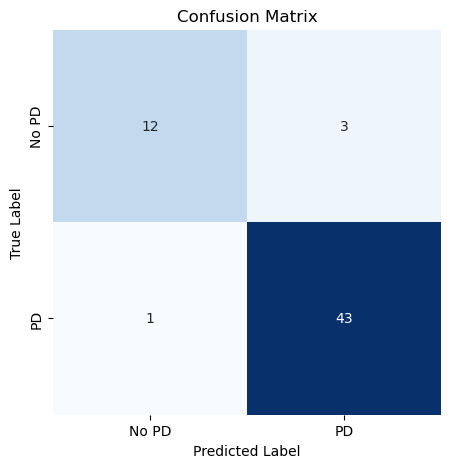

In [96]:
def confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=False, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Call the defined function with the confusion matrix and class labels
cm_rf = [[12,  3],
         [ 1, 43]]
classes = ['No PD', 'PD']
confusion_matrix(cm_rf, classes)

The model's accuracy is approximately 91.53%, indicating that the Random Forest classifier correctly predicted the presence of Parkinson's disease in 91.53% of the test cases. The confusion matrix provided the following findings: the bottom-right cell representing the number of patients correctly identified as having Parkinson's disease (43), top-left cell representing the number of patients correctly identified as not having Parkinson's disease (11), the top-right cell representing the number of patients incorrectly identified as having Parkinson's disease (4) and finally the bottom-left cell representing the number of patients incorrectly identified as not having Parkinson's disease (1).
The Random Forest classifier appears to perform well in diagnosing Parkinson's disease. The accuracy is relatively high, and the confusion matrix reveals a low number of false positives and false negatives; suggesting that the model is able to correctly classify a large percentage of the cases. Hence, this model suggests that it is reasonable for this method of diagnosis to enter the health field.

### Comparing our models

We are displaying the metrics of both models' perfomance capability in a table like manner below, so we may compare and evaluate which is a better model. 

In [97]:
data = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [0.8813559322033898, 0.7796610169491526],
    'Precision': [0.8775510204081632, 0.9696969696969697],
    'Recall': [0.9772727272727273, 0.7272727272727273],
    'F1 Score': [0.9247311827956989, 0.8311688311688312],
}

summary_parkinsons_data = pd.DataFrame(data)
print(summary_parkinsons_data)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.881356   0.877551  0.977273  0.924731
1        Random Forest  0.779661   0.969697  0.727273  0.831169


High accuracy is crucial for diagnostic machine learning models to minimise both false positives and false negatives.  This is the ratio of the total number of correct predictions to the total number of predictions made. It is calculated as (True Positives + True Negatives) / (True Positives + False Positives + True Negatives + False Negatives). In this context, Logistic Regression has a higher accuracy(88.14%), in comparison to Random Forest(77.97%), suggesting that the Logistic Regression model os better at classifying individuals with and without Parkinson's disease. 

High precision is essential to avoid overdiagnosis and unnecessary treatments, while high recall is critical for identifying as many true cases as possible. It is calculated as True Positives / (True Positives + False Positives). Logistic Regression has a higher recall (97.73%) but a slightly lower precision (87.76%) compared to Random Forest, which has a higher precision (96.97%) but a lower recall (72.73%).

The F1 Score is a metric that balances precision and recall. F1 Score is calculated as 2 * (Precision * Recall) / (Precision + Recall). Here, Logistic Regression has a higher F1 Score (92.47%) than Random Forest (83.12%), indicating that it provides a better balance between precision and recall for diagnosing Parkinson's disease.

To conclude, the Logistic Regression model is deemed to be a better model for diagnosing PD using voice data, because it has higher accuracy, recall, and F1 Score, making it suitable for voice-based diagnosis of Parkinson's disease, where detecting true cases is crucial. It also provides interpretable coefficients for each feature (binary variable of 0 or 1), providing us a link between the features and the predicted outcome. Additionally, it is a simple and an efficient model for this problem, as it is a smaller dataset with limited computational resources and provides fast model training and predictions. However, this model does have its weaknesses. It has a lower precision compared to Random Forest, thus meaning it produced more false-positives in voice-based diagnosis. Moreover, this assumes a linear relationship between the features and the log-odds of the target variable, thus may not be replicative in real-world scenarios.

### Determining the most influential factors

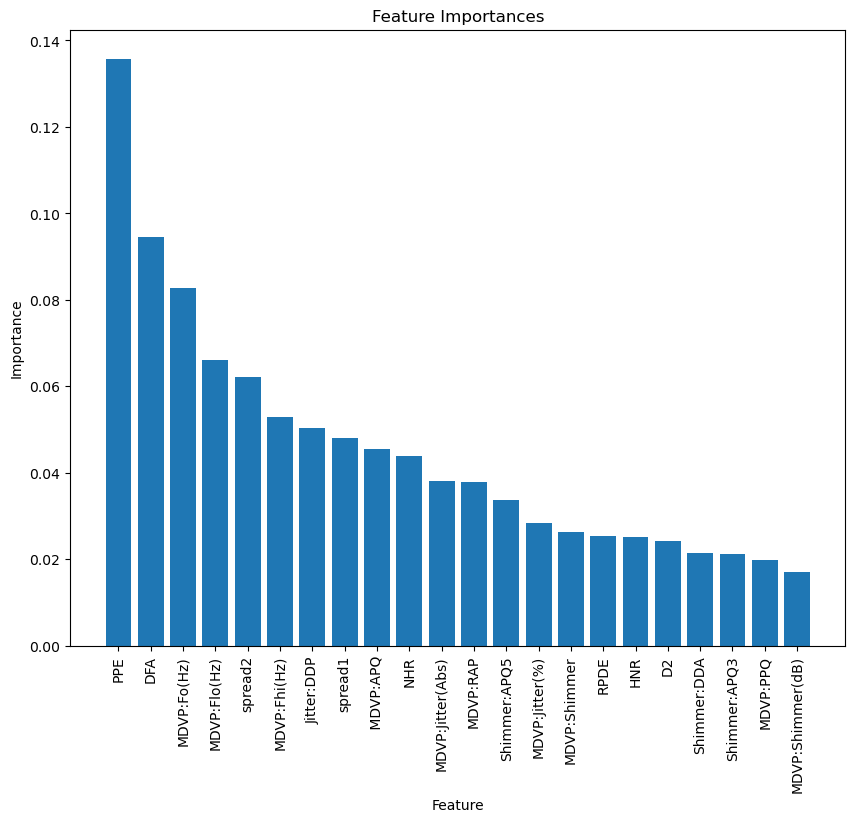

In [98]:
def plot_feature_importance(importances, feature_names, title='Feature Importances'):
    # Sort features by importance
    indices = np.argsort(importances)[::-1]
    sorted_feature_names = [feature_names[i] for i in indices]

    # Plot the feature importances
    plt.figure(figsize=(10, 8))
    plt.bar(range(X_train.shape[1]), importances[indices], align='center')
    plt.xticks(range(X_train.shape[1]), sorted_feature_names, rotation=90)
    plt.title(title)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.show()

# Get the feature importances and feature names
feature_importances = rf.feature_importances_
feature_names = X.columns

# Call the defined function with the feature importances
plot_feature_importance(feature_importances, feature_names)

This graphical representation presents that PPE, DFA and MDVP:Fo(Hz) are the most influential factor in delineating PD. This can be explained due to the effect of this disease on the nervous system and speech production. Let's discuss each feature individually. Firstly, PPE stands for Pitch Period Entropy, which measures the complexity of the pitch period in the voice signal. Patients with PD may have an infected vocal fold vibration due to the rigidity of laryngeal muscles, resulting in an irregular pitch period. This is picked up by PPE due to its sensitiveness to pitch variablity, thus deemed as an important feature in differentiating between PD patients and healthy individuals. Next, DFA(Detrended Fluctuation Analysis) identifies long-range correlations in the amplitude fluctuations of a signal. This is useful for diagnosis, as PD patients portray increased vocal tremor in their amplitude of their speech signals, resulted by their impaired neural control over the vocal muscles. Finally, Mean Fundamental Frequency (MDVP:Fo(Hz)) measures the average pitch of an individual's voice that is influenced by the tension and mass of the vocal folds in the throat.  As mentioned, PD impacts the nervous systems and the control of laryngeal muscles which may alter the structure of the vocal folds, affecting the MDVP:Fo(Hz) as a consequence.
In summary, we can conclude that these 3 features are the most influential in diagnosing PD accurately. PPE and DFA are the most sensitive to the irregularities and long-range correlations in the speech signal, which are commonly observed in PD patients. MDVP:Fo(Hz), on the other hand, provides additional information about the speaker's voice characteristics that can be helpful in distinguishing between PD patients and healthy individuals. In combination, these features enable accurate and reliable diagnosis of PD using voice recordings.

### Application of the Logistic Regression model to a clinical setting

***Ease of Implementation***
Logistic regression is a widely accepted method, with a vast amount of existing tools, which makes it easy to implement in a medical context. Hospitals and healthcare professionals can easily integrate logistic regression into existing systems without the need for extensive training or resources, reducing the learning curve. Additionally, it only requires sufficient amount of data to produce meaningful results, which can be advantageous in situations such as this where our data is limited.

***Scalability***
This model is also capable of handling large datasets efficiently, therefore is a scalable solution for PD diagnosis in a clinical setting. These models usually require lightweight computational resources, hence hospitals will still be able to analyse an increase in the volume of patient data with minimal hardware adaptations; the model can be updated to improve its levels of accuracy and performance.

***Ethical Implications***
The advantages of using machine learning are plenty: greater diagnostic accuracy, earlier detection and better outcomes. On the other hand, ethical considerations are a signigficant part in getting the model approved. One of the main pillars of medicine is that patient confidentiality is crucial, thus the model must with-hold the privacy and security of patient data. the hospital must have various secure protection measures to prevent data breaches and misuse of information. Additionally, it is critical for our model to be versatile and prevent being prone to any algorithmic bias in our data. Hence, the hospitals must be vigilant in ensuring that the model is fair and accurate for all patients, regardless of their ethnic background, gender or age. Lastly, our model must provide transparent insights so it is easily comprehenable by the healthcare professionals who are not very diligent with how machine learning models work and how this particular model works and how the factors influence its predictions. This helps ensure both patient and doctors are both able to trust the technology as a reliable diagnostic tool.

## Conclusion

Our study has outlined that Logistic Regression is the best performed model in terms of accuracy, precision, F1 score, and recall.  It is important to note that while this model has performed better than the Random Forest model, it may not necessarily be the most appropriate approach for diagnosing PD based on vocal patterns. This is because this model did have an issue of predicting a high number of false positives, which indicates that it is likely capable to misclassify patients healthy individuals as PD patients. This might cause unnecessary panic in those that do not have PD and may cost our heathcare system millions of pounds for treating and looking after healthy individuals. Additionally, we have can consider feature engineering, hyperparameter tuning and cross-validation to further enhnace our model's performance.
We have also assessed the benefits and potential challenges of deploying these models in clinical settings; considering factors such as ease of implementation, scalability, and ethical implications. It is important to weigh the potential benefits of using machine learning models for PD diagnosis, such as increased accuracy and efficiency, against the potential challenges and limitations, such as the need for data privacy and patient confidentiality.
We can also acknowledge that we have idenitfied that features such as PPE, DFA and MDVP:Fo(Hz) are the most influential in dictating the diagnosis. However, there were also other closely-linked features that may have correlated to an accurate diagnosis. Lastly, until an even more reliable model has been developed and provides a 100% accurate diagnosis when tested on a huge dataset, machine learning models for medical diagnosis should be used with caution and under expert supervision and knowledge to avoid potential harm caused by incorrect predictions.

## References
bgdteam. (2022, June 24). Parkinson’s disease | fact sheet | health information | brain & spine foundation. https://www.brainandspine.org.uk/health-information/fact-sheets/parkinsons-disease/

Parkinson’s disease—Diagnosis. (2017, October 23). Nhs.Uk. https://www.nhs.uk/conditions/parkinsons-disease/diagnosis/

Reporting on Parkinson’s: Information for journalists. (n.d.). Parkinson’s UK. Retrieved 23 April 2023, from https://www.parkinsons.org.uk/about-us/reporting-parkinsons-information-journalists

Sonne, J., Reddy, V., & Beato, M. R. (2023). Neuroanatomy, substantia nigra. In StatPearls. StatPearls Publishing. http://www.ncbi.nlm.nih.gov/books/NBK536995/

Surmeier, D. J., Guzman, J. N., Sanchez-Padilla, J., & Goldberg, J. A. (2010). Chapter 4—What causes the death of dopaminergic neurons in Parkinson’s disease? In A. Björklund & M. A. Cenci (Eds.), Progress in Brain Research (Vol. 183, pp. 59–77). Elsevier. https://doi.org/10.1016/S0079-6123(10)83004-3